# Source : 
### https://alpaca.markets/learn/understanding-alpacas-market-data-api-with-pandas-and-plotly/

# Install alpaca trade api

In [ ]:
 !pip install alpaca_trade_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.5
    Uninstalling msgpack-1.0.5:
      Successfully uninstalled msgpack-1.0.5


In [ ]:
import alpaca_trade_api as alpacatrade
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# API keys and connection establish

In [ ]:
base_url = 'https://paper-api.alpaca.markets'
api_key = "PK7WZLWPRI3DIXSU2AKB"
api_secret_key = "zrSjMJgKOcyGIbpPViPzwlrQFpeLSapdg8kj6j25"

In [ ]:
# Create a connection with Rest API
api = alpacatrade.REST(key_id= api_key, secret_key= api_secret_key, base_url= base_url)

# Test out the connection by calling acount 

In [ ]:
# Fetch Account
account = api.get_account()
# Print Account Details
print(account.id, account.equity, account.status)

a9bfbcba-fe38-4333-969f-3cfc458c3000 100000 ACTIVE


# Fetch Market data

In [ ]:
# Setting parameters for code calling
symbol = "AAPL"
timeframe = "1Minute"
start = "2022-01-01"
end = "2023-01-01" # YYYY-MM-DD
# Using bar data method
apple_bars = api.get_bars(symbol, timeframe, start, end).df
#apple_bars['timestamp']= apple_bars['timestamp'].dt.tz_convert('America/New_York')
#apple_bars = apple_bars.set_index('timestamp')
#apple_bars['timestamp']= apple_bars['timestamp'].dt.tz_convert('America/New_York')
# get only market hours
apple_bars = apple_bars.between_time('9:30', '16:00')
print(apple_bars.head(10))

                             open    high     low   close  volume  \
timestamp                                                           
2022-01-03 09:30:00+00:00  177.87  177.87  177.87  177.87     467   
2022-01-03 09:31:00+00:00  177.87  177.87  177.80  177.80     634   
2022-01-03 09:32:00+00:00  177.80  177.80  177.80  177.80    1047   
2022-01-03 09:33:00+00:00  177.76  177.76  177.76  177.76     633   
2022-01-03 09:34:00+00:00  177.77  177.85  177.77  177.85     958   
2022-01-03 09:36:00+00:00  177.85  177.88  177.81  177.81    1644   
2022-01-03 09:37:00+00:00  177.81  177.81  177.80  177.81    1364   
2022-01-03 09:38:00+00:00  177.80  177.80  177.80  177.80     563   
2022-01-03 09:39:00+00:00  177.83  177.84  177.77  177.77    2278   
2022-01-03 09:40:00+00:00  177.83  177.84  177.83  177.84     850   

                           trade_count        vwap  
timestamp                                           
2022-01-03 09:30:00+00:00           17  177.871842  
2022-01-03 0

In [ ]:
# convert dataframe to Pandas
pd.DataFrame(apple_bars)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-01-03 09:30:00+00:00,177.8700,177.8700,177.870,177.8700,467,17,177.871842
2022-01-03 09:31:00+00:00,177.8700,177.8700,177.800,177.8000,634,20,177.817618
2022-01-03 09:32:00+00:00,177.8000,177.8000,177.800,177.8000,1047,59,177.804413
2022-01-03 09:33:00+00:00,177.7600,177.7600,177.760,177.7600,633,50,177.768815
2022-01-03 09:34:00+00:00,177.7700,177.8500,177.770,177.8500,958,11,177.808173
...,...,...,...,...,...,...,...
2022-12-30 15:56:00+00:00,128.8192,128.8400,128.710,128.7508,135152,1248,128.790486
2022-12-30 15:57:00+00:00,128.7500,128.7600,128.626,128.6650,147990,1524,128.698747
2022-12-30 15:58:00+00:00,128.6675,128.7300,128.600,128.6850,137146,1194,128.685074


# Data exploratory

In [ ]:
# Changing the object to pandas dataframe
#apple_bars2 = pd.DataFrame(apple_bars)
#print(apple_bars2.head())
#apple_bars3 = apple_bars2[["open","high","low", "close", "volume"]]
#print(apple_bars3.head())

In [ ]:
# size of the data
apple_bars.shape[0]
# 207,018 rows dataset.

83010

In [ ]:
# Data type of each column
apple_bars.dtypes

open           float64
high           float64
low            float64
close          float64
volume           int64
trade_count      int64
vwap           float64
dtype: object

# Data Wrangling
return variable = (close - open)/open to get percentage gains.

Wants data from 9:30am to 4:00pm. Starts at 9:31

Adds in Y variable. Shift 5 times (-1). Remove the unshifted columns to left of gains.



In [ ]:
#  Create a new column that contains gains value of each call every minute
apple_bars["Gains (%)"]= (apple_bars["close"]- apple_bars["open"])/apple_bars["open"]
apple_bars

,open,high,low,close,volume,trade_count,vwap,Gains (%)
timestamp,,,,,,,,
2022-01-03 09:30:00+00:00,177.8700,177.8700,177.870,177.8700,467,17,177.871842,0.000000
2022-01-03 09:31:00+00:00,177.8700,177.8700,177.800,177.8000,634,20,177.817618,-0.000394
2022-01-03 09:32:00+00:00,177.8000,177.8000,177.800,177.8000,1047,59,177.804413,0.000000
2022-01-03 09:33:00+00:00,177.7600,177.7600,177.760,177.7600,633,50,177.768815,0.000000
2022-01-03 09:34:00+00:00,177.7700,177.8500,177.770,177.8500,958,11,177.808173,0.000450
...,...,...,...,...,...,...,...,...
2022-12-30 15:56:00+00:00,128.8192,128.8400,128.710,128.7508,135152,1248,128.790486,-0.000531
2022-12-30 15:57:00+00:00,128.7500,128.7600,128.626,128.6650,147990,1524,128.698747,-0.000660
2022-12-30 15:58:00+00:00,128.6675,128.7300,128.600,128.6850,137146,1194,128.685074,0.000136


# Test dataframe for shift funciton


In [ ]:
# Subset dataframe to work on using shift function
# temp = apple_bars.iloc[0:5,]

In [ ]:
# First row shift - shift downwards
# temp.shift(1)

In [ ]:
# Bottom row shift - shift upwards
# temp.shift(-1)

In [ ]:
# Shift 5 times bottom row to get the 5th minute to be the first row - TEST. Ignore index so that we can remove the left hand side easily
# test = pd.concat([temp, temp.shift(-1), temp.shift(-2), temp.shift(-3), temp.shift(-4), temp.shift(-5)],axis = 1, ignore_index= True)

# test2 = test.drop(test.iloc[:,0:7], axis = 1)
# test2 # 5x41 df

In [ ]:
# y_test = test2.iloc[:,0]
# y_test

# Actual data work 
## Shift downwards in order to use the 1st minute data to predict the 5th min gains

In [ ]:
# Shifted downwards data frame for apple stock
shifted_apple = pd.concat([apple_bars, apple_bars.shift(1), apple_bars.shift(2), apple_bars.shift(3), apple_bars.shift(4), apple_bars.shift(5)], axis = 1)

# Remove the columns to the left of gains - 6 columns
shifted_apple1 = shifted_apple.iloc[:,7:]

In [ ]:
# columns name for shifted_apple1 
shifted_apple1.columns

Index(['Gains (%)', 'open', 'high', 'low', 'close', 'volume', 'trade_count',
       'vwap', 'Gains (%)', 'open', 'high', 'low', 'close', 'volume',
       'trade_count', 'vwap', 'Gains (%)', 'open', 'high', 'low', 'close',
       'volume', 'trade_count', 'vwap', 'Gains (%)', 'open', 'high', 'low',
       'close', 'volume', 'trade_count', 'vwap', 'Gains (%)', 'open', 'high',
       'low', 'close', 'volume', 'trade_count', 'vwap', 'Gains (%)'],
      dtype='object')

In [ ]:
# rename "open' columns with t-1, t-2,t-3
shifted_apple1.columns.values[1] = 'open (t-1)'
shifted_apple1.columns.values[9] = 'open (t-2)'
shifted_apple1.columns.values[17] = 'open (t-3)'
shifted_apple1.columns.values[25] = 'open (t-4)'
shifted_apple1.columns.values[33] = 'open (t-5)'

In [ ]:
# rename 'high' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[2] = 'high (t-1)'
shifted_apple1.columns.values[10] = 'high (t-2)'
shifted_apple1.columns.values[18] = 'high (t-3)'
shifted_apple1.columns.values[26] = 'high (t-4)'
shifted_apple1.columns.values[34] = 'high (t-5)'

In [ ]:
# rename 'low' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[3] = 'low (t-1)'
shifted_apple1.columns.values[11] = 'low (t-2)'
shifted_apple1.columns.values[19] = 'low (t-3)'
shifted_apple1.columns.values[27] = 'low (t-4)'
shifted_apple1.columns.values[35] = 'low (t-5)'

In [ ]:
# rename 'close' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[4] = 'close (t-1)'
shifted_apple1.columns.values[12] = 'close (t-2)'
shifted_apple1.columns.values[20] = 'close (t-3)'
shifted_apple1.columns.values[28] = 'close (t-4)'
shifted_apple1.columns.values[36] = 'close (t-5)'

In [ ]:
# rename 'volume' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[5] = 'volume (t-1)'
shifted_apple1.columns.values[13] = 'volume (t-2)'
shifted_apple1.columns.values[21] = 'volume (t-3)'
shifted_apple1.columns.values[29] = 'volume (t-4)'
shifted_apple1.columns.values[37] = 'volume (t-5)'

In [ ]:
# rename 'trade_count' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[6] = 'trade_count (t-1)'
shifted_apple1.columns.values[14] = 'trade_count (t-2)'
shifted_apple1.columns.values[22] = 'trade_count (t-3)'
shifted_apple1.columns.values[30] = 'trade_count (t-4)'
shifted_apple1.columns.values[38] = 'trade_count (t-5)'

In [ ]:
# rename 'vwap' columns with t-1, t-2, t-3,...
shifted_apple1.columns.values[7] = 'vwap (t-1)'
shifted_apple1.columns.values[15] = 'vwap (t-2)'
shifted_apple1.columns.values[23] = 'vwap (t-3)'
shifted_apple1.columns.values[31] = 'vwap (t-4)'
shifted_apple1.columns.values[39] = 'vwap (t-5)'

# Create a Target variable object. Which consists of the 1st column in Shifted_apple_1 (y_train)

In [ ]:
# Create target variable column: y
y = pd.DataFrame(shifted_apple1.iloc[:,0])
y.columns
y.isna().sum() # 0 missing values

Gains (%)    0
dtype: int64

# Create a Feature variables object by removing all Gains columns (x_train)

In [ ]:
# Create a Featured variables dataframe
x = shifted_apple1.drop(["Gains (%)"], axis = 1)
x.columns
x.isnull().sum() # There are missing values for each column in x_train

open (t-1)           1
high (t-1)           1
low (t-1)            1
close (t-1)          1
volume (t-1)         1
trade_count (t-1)    1
vwap (t-1)           1
open (t-2)           2
high (t-2)           2
low (t-2)            2
close (t-2)          2
volume (t-2)         2
trade_count (t-2)    2
vwap (t-2)           2
open (t-3)           3
high (t-3)           3
low (t-3)            3
close (t-3)          3
volume (t-3)         3
trade_count (t-3)    3
vwap (t-3)           3
open (t-4)           4
high (t-4)           4
low (t-4)            4
close (t-4)          4
volume (t-4)         4
trade_count (t-4)    4
vwap (t-4)           4
open (t-5)           5
high (t-5)           5
low (t-5)            5
close (t-5)          5
volume (t-5)         5
trade_count (t-5)    5
vwap (t-5)           5
dtype: int64

# Need to preprocess the data first. Fill all NAs value with 0
https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

In [ ]:
# x_1 have all filled NAs values with 0 
x_1 = x.fillna(0)

# Create train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1,y ,
                                                    random_state=104, 
                                                    test_size=0.3)

In [ ]:
x_train.shape

(58107, 35)

In [ ]:
x_test.shape

(24903, 35)

# Decion Tree Regression Problem
https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [ ]:
# random_state controls randomness of the sample. Model will always produce the same results.
regression_model = DecisionTreeRegressor()

In [ ]:
## Grid Search for most optimal Tree model
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

## Initiate parameters for the model
# parameters={"splitter":["best","random"],
            #"max_depth" : [1,3,5,7,9,11,12],
           #"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
# Perform GridSearch for the best model
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5, # 5 is a good choice for K-fold
                  verbose = 3,
                  scoring='neg_mean_squared_error')
## Fitting the training data into grid search
gs.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=1, min_samples_split=10;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=1, min_samples_split=10;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=1, min_samples_split=10;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=1, min_samples_split=10;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=1, min_samples_split=10;, score=-0.000 total time=   0.2s
[CV 1/5] END max_depth=1, min_samples_split=20;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=1, min_samples_split=20;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=1, min_samples_split=20;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=1, min_samples_split=20;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=1, min_samples_split=20;, score=-0.000 total time=   0.2s
[CV 1/5] END max_depth=1, min_samples_split=30;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=1, min_samples_split=30;

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Print out best parameters and best scoring for the model
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 1, 'min_samples_split': 10}
7.715733451794498e-07


Ignore the best score for now

# Fit the new optimal model inside the training set

In [ ]:
tuned_model = DecisionTreeRegressor(max_depth=1,
                                  min_samples_split=10)
#or new_model = gs.best_estimator_
tuned_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=1, min_samples_split=10)

In [ ]:
# Prediction on x_test set
tuned_pred=tuned_model.predict(x_test)

In [ ]:
# With hyperparameter tuned comparing predicted value on x_test and actual y_test value

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.0005206321055403649
MSE: 7.794917059992064e-07
RMSE: 0.0008828882749245266


MSE are not very intuitive because the units the metrics are expressed in do have much meaning. So, we usually use the RMSE metric, which simply takes the square root of the MSE metric so that your error metric is in the same units as your response variable.

# Create a scatter plot to check the predicted value vs actual value

Text(0, 0.5, 'Predicted value')

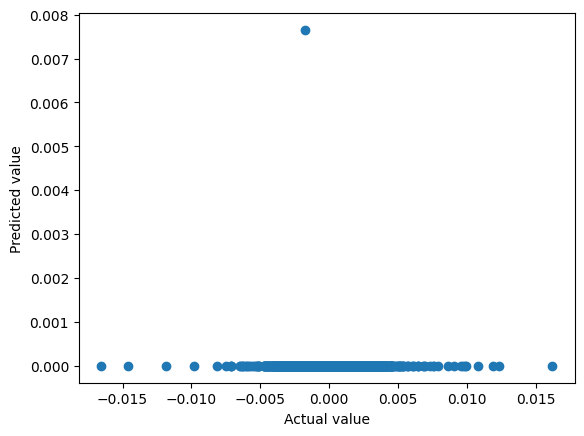

In [ ]:
plt.scatter(y_test, tuned_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

Seems like the data is not predicting well. The result should be near a 45* degree line as a line of best fit. It is predicting pretty much 0 for all the values which is not true. It is important to notice as well that the model is ignoring negative gains.

## Draw back for decision tree models is that they can take a long time to compute since there are many different levels it can go to. Tuning this model takes me a long time to tune the parameters.

## Tree models are also not as accurate compare to other models